In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('ushape.csv')

In [3]:
df.head()

3.159499363321345566e-02  9.869877579082642072e-01  \
0                  2.115098                 -0.046244   
1                  0.882490                 -0.075756   
2                 -0.055144                 -0.037332   
3                  0.829545                 -0.539321   
4                  2.112857                  0.662084   

   0.000000000000000000e+00  
0                       1.0  
1                       0.0  
2                       1.0  
3                       1.0  
4                       1.0

In [4]:
df.rename({'3.159499363321345566e-02':'X', '9.869877579082642072e-01':'Y', '0.000000000000000000e+00':'class'}, axis=1, inplace=True)
df.head()

X         Y  class
0  2.115098 -0.046244    1.0
1  0.882490 -0.075756    0.0
2 -0.055144 -0.037332    1.0
3  0.829545 -0.539321    1.0
4  2.112857  0.662084    1.0

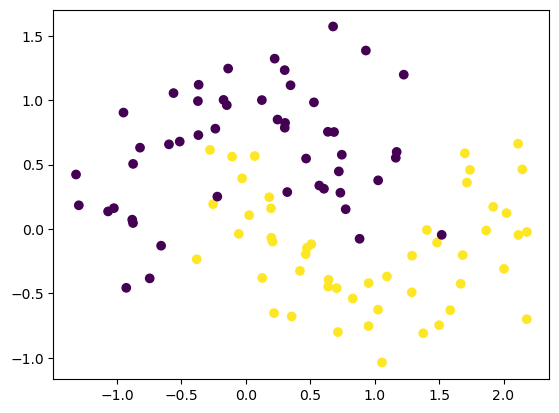

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
#Xavier_normal


model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorat_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorat_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorat_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorat_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

ValueError: Unknown initializer: 'glorat_normal'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [9]:
#Xavier_uniform


# model = Sequential()

# model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorat_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorat_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorat_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorat_uniform'))
# model.add(Dense(1,activation='sigmoid'))

# model.summary()

In [10]:
#He_normal


# model = Sequential()

# model.add(Dense(10,activation='tanh',input_dim=2, kernel_initializer='he_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='he_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='he_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='he_normal'))
# model.add(Dense(1,activation='sigmoid'))

# model.summary()

In [11]:
#He_uniform


# model = Sequential()

# model.add(Dense(10,activation='tanh',input_dim=2, kernel_initializer='he_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='he_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='he_uniform'))
# model.add(Dense(10,activation='tanh',kernel_initializer='he_uniform'))
# model.add(Dense(1,activation='sigmoid'))

# model.summary()

In [12]:
model.get_weights()

ValueError: Weights for model 'sequential' have not yet been created. Weights are created when the model is first called on inputs or `build()` is called with an `input_shape`.

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

In [ ]:
model.get_weights()

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)